## <center> Modelo Cirugía Láser </center>
### 1. Librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rv_discrete, rv_histogram, binom
from statsmodels.distributions.empirical_distribution import ECDF


### 2. Entradas Conocidas

In [2]:
reservas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
probabilidad = [0.02, 0.05, 0.08, 0.16, 0.26, 0.18, 0.11, 0.07, 0.05, 0.01, 0.01]
trials = 5000 # Numero de simulaciones

### 3. Variables de decisión

In [3]:
# seed = 1234
ingreso_c = [2000, 2000, 1500, 1500]
prob_c = [0.25, 0.25, 0.40, 0.40]
min_reunion_c = [3, 1, 3, 1]

### 4. Entradas inciertas

In [5]:
def gen_reserva():
    c_reservas = rv_discrete(name='custom_reservas', values=(reservas, probabilidad))
    return c_reservas.rvs(size=1)[0]
print(gen_reserva())

1


### 5. Cálculos intermedios

In [6]:
def simular(ingreso_c, prob_c, min_reunion_c):
    nro_reservas = gen_reserva()
    if nro_reservas < min_reunion_c:
        nro_cirugias = 0
    else:
        nro_cirugias = binom.rvs(n=nro_reservas, p=prob_c, size=1)[0]
    ingreso_s = nro_cirugias*ingreso_c

    return ingreso_s

### 5. Salidas

In [8]:
resultados = {}
for ingreso, prob, reunion in zip(ingreso_c, prob_c, min_reunion_c):
    # print(ingreso, prob, reunion)
    vector_utilidades = []
    for i in range(trials):
        vector_utilidades.append(simular(ingreso, prob, reunion))
        # print(vector_utilidades)
    key = f'Ingreso: {ingreso}, Prob: {prob}, Reunion: {reunion}'
    resultados[key] = vector_utilidades
    # print(f'Utilidad promedio para {ingreso} ingreso, {prob} probabilidad y {reunion} minimo de reunion: {utilidad_promedio:.4f}')
    

### 6. Resumen

Ingreso: 2000, Prob: 0.25, Reunion: 3: 2050.0
Ingreso: 2000, Prob: 0.25, Reunion: 1: 2228.0
Ingreso: 1500, Prob: 0.4, Reunion: 3: 2471.4
Ingreso: 1500, Prob: 0.4, Reunion: 1: 2608.2
P(X ≤ 2000) en Ingreso: 1500, Prob: 0.4, Reunion: 1: 0.4736


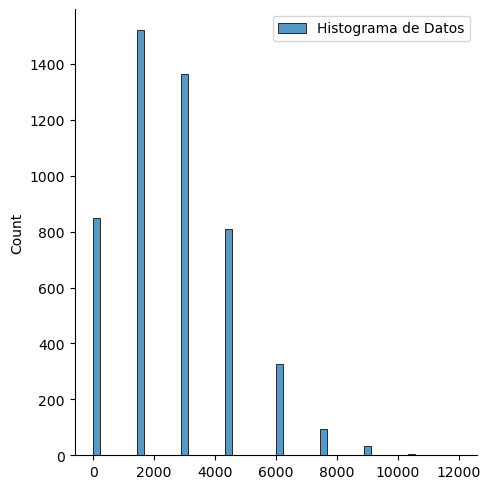

In [11]:
val_results = {}
ecdf_results = {}
hist_results = {}
for key, values in resultados.items():
    # Calcular la ecdef y el histograma
    ecdf=ECDF(values)
    hist = np.histogram(values, bins="sturges", density=True)
    # Ajustar el histograma a una distribución
    hist_dist = rv_histogram(hist)
    # Guardar los resultados en los diccionarios
    ecdf_results[key] = ecdf
    hist_results[key] = hist_dist
    val_results[key] = values
    print(f'{key}: {np.mean(values)}')

ejemplo_key=list(hist_results.keys())[3] 
hist_funcion=hist_results[ejemplo_key]
val_funcion=val_results[ejemplo_key]
ecdf_funcion=ecdf_results[ejemplo_key]
probabilidad = ecdf_funcion(2000)
print(f'P(X ≤ 2000) en {ejemplo_key}: {probabilidad:.4f}')
# plt.hist(val_funcion, bins=7, density=True, alpha=0.5, label='Histograma de Datos')
sns.displot(val_funcion, bins=50, label='Histograma de Datos')
plt.legend()
plt.show()